# 0. 패키지 불러오기 

In [39]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

In [40]:
# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터 구성하기 

In [41]:
df_raw=pd.read_csv("/home/piai/Downloads/데이터_1/IRIS.csv", engine='python')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2. 데이터 전처리 - 결측치 처리

In [42]:
df_raw.isnull().sum(axis=0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [43]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [44]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw.drop("SPECIES", axis=1, inplace=False) # 목표변수와 의미 없는 변수는 삭제한다. 
df_raw_y=df_raw["SPECIES"] # 목표 변수를 0,1로 바꾼다. 

# 3. 데이터 구성하기 - 더미변수 생성

In [21]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
df_raw_x=df_raw_dummy

In [47]:
# train, test 데이터를 7:3 비율로 분할한다. 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (105, 4)
train data Y size : (105,)
test data X size : (45, 4)
test data Y size : (45,)


In [48]:
# 데이터 분할 
df_train,df_test=train_test_split(df_raw_dummy, test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

train data size:(105, 4)
test data size:(45, 4)


# 4. 모델 생성

### 4-0 모델 생성

In [49]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.978


In [50]:
tree_uncustomized 

DecisionTreeClassifier(random_state=1234)

### 4-1 모델 Parameter 조정 : 최대 깊이 변경에 따른 모델 성능

In [51]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=1234 ,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesLeaf']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.686,0.622
1,2,0.962,0.956
2,3,0.981,0.978
3,4,0.990,0.978
4,5,1.000,0.978
5,6,1.000,0.978
6,7,1.000,0.978
7,8,1.000,0.978
8,9,1.000,0.978
9,10,1.000,0.978


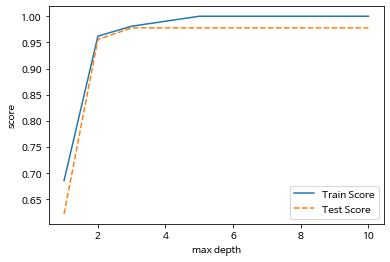

In [52]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

# if test score이 더 높다해도 반드시 좋은 것은 아니다. 

In [38]:
# 변수명 저장 
v_feature_name=df_train_x.columns

# 깊이가 4인 모델 
tree_low=DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 0: Good, 1:Bad) 
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Good", "Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f: 
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

IndexError: list index out of range

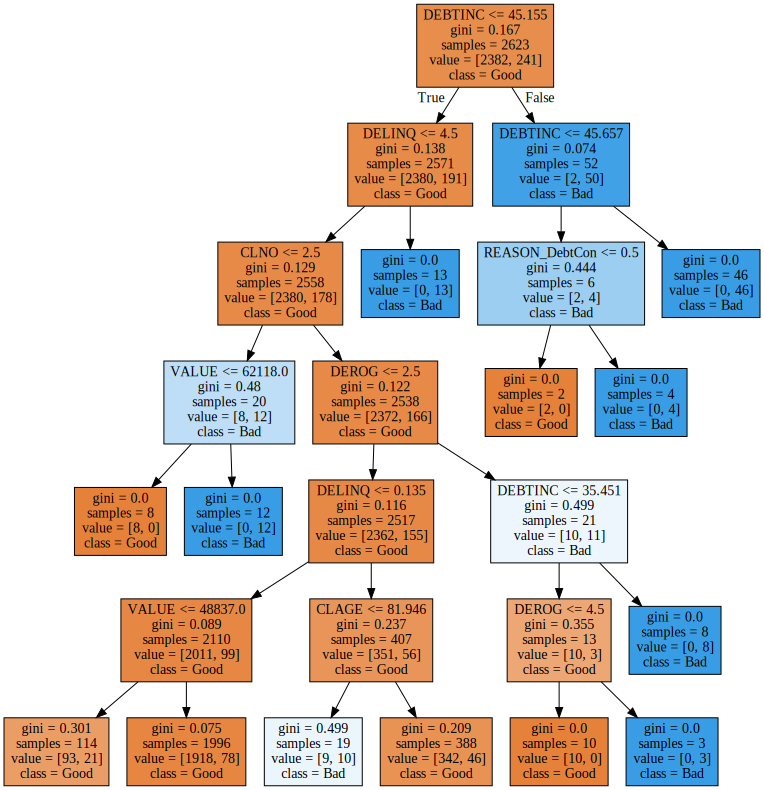

In [29]:
# 깊이가 6인 모델 
tree_low=DecisionTreeClassifier(max_depth=6, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 0: Good, 1:Bad) 
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Good", "Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f: 
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 4-2 min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [73]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_split=[n_split * 10 for n_split in range(1,11)] # 참조 : para_leaf:[10,20,30,...,100]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_split=v_min_samples_split,\
                                max_depth=4)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesLeaf']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


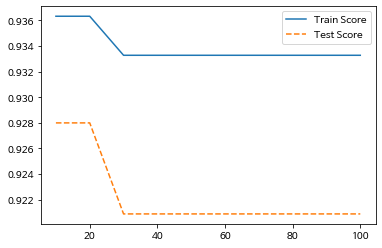

In [74]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

#### 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, train/test 데이터의 성능 변화를 고려하여 20 선택

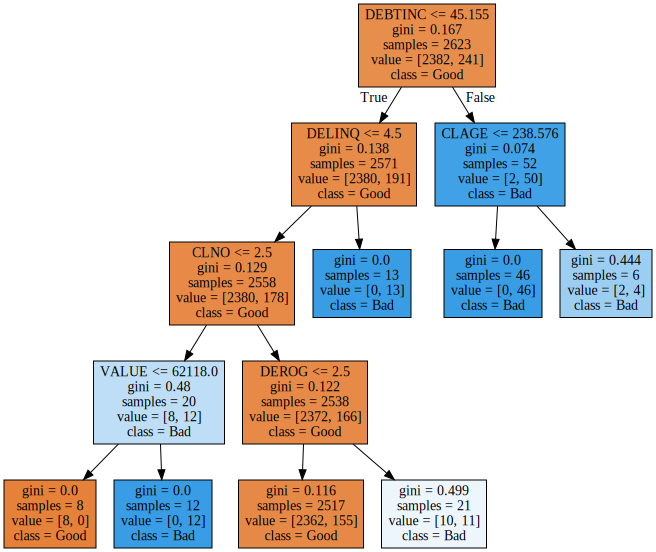

In [50]:
# 분리 노드의 최소 사료 수가 20인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_split=20,max_depth=4)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

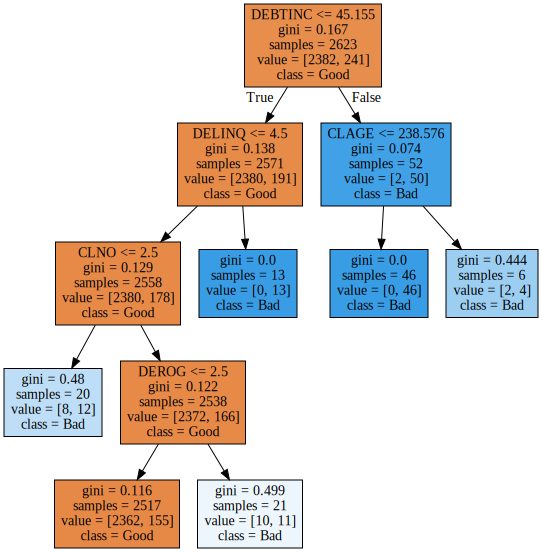

In [51]:
# 분리 노드의 최소 사료 수가 30인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_split=30,max_depth=4)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 4-3 min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [43]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_leaf=[n_leaf * 2 for n_leaf in range(1,11)] # 참조 : para_leaf:[2,4,6,...20]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,\
                            min_samples_split=20,max_depth=4)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


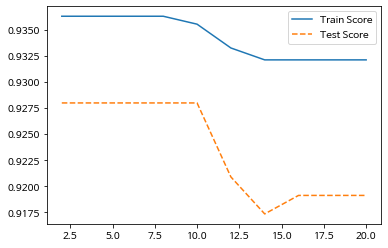

In [44]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

#### 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 Train/test 데이터의 성능 변화를 고려하여 10을 선택 

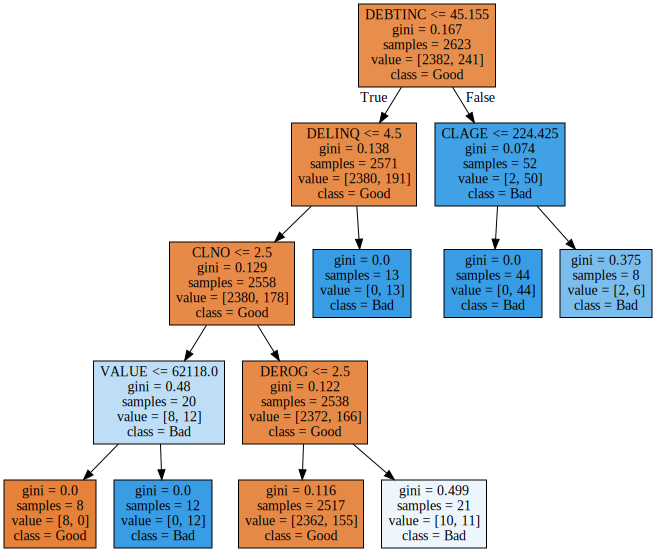

In [56]:
# 잎사귀 노드의 최소 사료 수가 8인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_leaf=8,max_depth=4)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

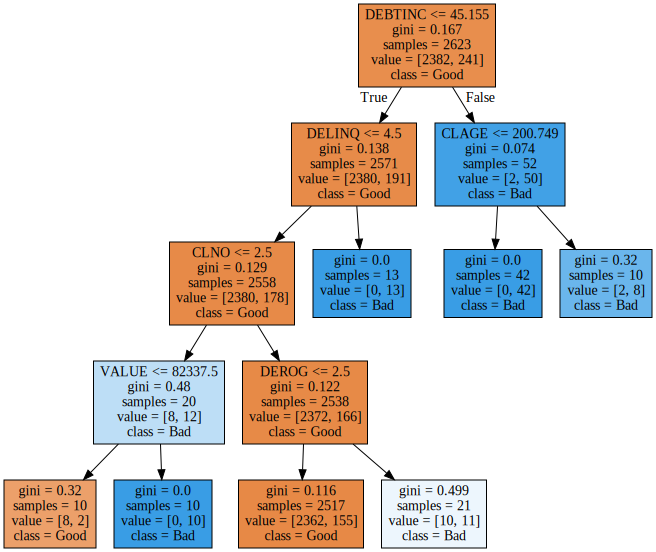

In [57]:
# 잎사귀 노드의 최소 사료 수가 10인 무델 
tree_hign=DecisionTreeClassifier(random_state=1234,min_samples_leaf=10,max_depth=4)
tree_hign.fit(df_train_x,df_train_y)

export_graphviz(tree_hign,out_file='tree_hign.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_hign.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 4-4 모델 파라미터 조정 - GridSearchCV를 이용한 최적 parameter 찾기 

In [60]:
estimator=DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf,\
            'min_samples_split': para_split}

# 설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_test_x,df_test_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=40)

best parameter:
{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 40}

best score:
0.929


#### GridSearchCV를 이용하였을 때, 최대 깊이는 2, 잎사귀의 최소 샘플 수가 10일 때 정확도가 92.9%이다. GridSearchCV는 fit을 이용하여 data를 적합시킬 때 train/validation 데이터로 나누어 cross-validation을 적용하므로 앞선 결과와 다를 수 있음

# 3. 결론 도출

### 3-1 최종 모델 선택 

In [53]:
# 최종 모델 
tree_final=DecisionTreeClassifier(random_state=1234, max_depth=4 \
                              ,min_samples_split=10, min_samples_leaf=5)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=1234)

### 3-2 최종 모델 시각화 

In [55]:
# tree_final.dot으로 결과 저장 
export_graphviz(tree_final, out_file="tree_final.dot", class_names=["Good","Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

IndexError: list index out of range

In [31]:
# 평가 
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.962
Confusion matrix:
[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


### 3-3 feature_importances_ : 설명 중요도

In [32]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

NameError: name 'v_feature_name' is not defined

Text(0, 0.5, '변수')

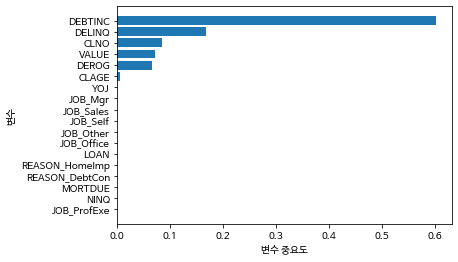

In [71]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')